Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Xinyu Meng"
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Xinyu Meng<br>
<b>NetID</b>:xm73<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:     
X.M

<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 5: Multivariate Linear Regression

### Due Date: Wednesday December 14, 2022 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (data/USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the features you need. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [3]:
import pandas as pd
df=pd.read_csv('data/USA_Housing.csv', sep=',',header=None)
df = df[[1,2,5]]
df.columns = df.iloc[0]
df = df[1:]
df_adjusted = df
df_adjusted

,Avg. Area House Age,Avg. Area Number of Rooms,Price
1,5.682861322,7.009188143,1059033.558
2,6.002899808,6.730821019,1505890.915
3,5.86588984,8.51272743,1058987.988
4,7.188236095,5.586728665,1260616.807
5,5.040554523,7.839387785,630943.4893
...,...,...,...
4996,7.830362444,6.137356228,1060193.786
4997,6.999134987,6.576762661,1482617.729
4998,7.250590615,4.80508098,1030729.583
4999,5.534388416,7.130143864,1198656.872


In [4]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
from sklearn.model_selection import train_test_split
df_training, df_testing = train_test_split(df_adjusted, test_size=0.1, train_size=0.9, random_state=50)
print(df_training)
print(df_testing)

0    Avg. Area House Age Avg. Area Number of Rooms        Price
4057         6.099807764               5.548363334  1116680.146
2285         4.607793092               5.763787958  440585.0294
2558         5.152322989               6.732551727  1115721.687
1031         6.232921557               6.396693318  1384466.437
284          6.446181952               8.274063584  1912825.285
...                  ...                       ...          ...
3331         7.721908811                 7.6219751  1521141.345
71           4.764499308               7.168662411  1146532.455
133          8.137214471               5.650900286  1246246.828
2015         5.356907402               5.906375023  1155681.867
1932         4.473606695               5.924214538  1276987.492

[4500 rows x 3 columns]
0    Avg. Area House Age Avg. Area Number of Rooms        Price
3432         5.828142871                4.85142302  612938.7145
2043         6.918945345               6.245655683   1347083.07
80           6.

### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [5]:
from sklearn.preprocessing import MinMaxScaler
### BEGIN ANSWER
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_training)
X_scaled_values = temp[:,[[0],[1]]]
Y_scaled_values = temp[:,[2]]
### END ANSWER
# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values
new_x = [x[:,0], x[:,1]]
x = new_x
print(x[0])
print(x[1])
print(y)

[[0.5026345 ]
 [0.28560736]
 [0.3648142 ]
 ...
 [0.79899389]
 [0.39457287]
 [0.26608873]]
[[0.3073306 ]
 [0.33596457]
 [0.46473142]
 ...
 [0.32095968]
 [0.35491706]
 [0.35728827]]
[[0.44870955]
 [0.17310412]
 [0.44831884]
 ...
 [0.5015265 ]
 [0.46460833]
 [0.51405772]]


### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

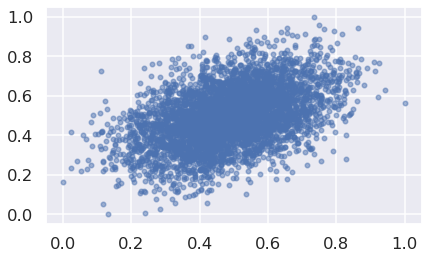

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN ANSWER
plt.scatter(x[0],y, alpha=0.5, s=20)

### END ANSWER

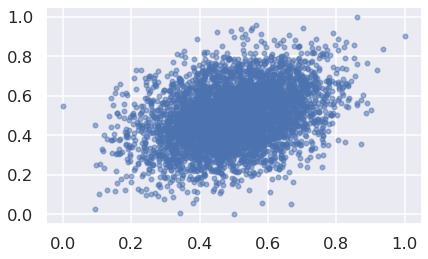

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN ANSWER
plt.scatter(x[1],y, alpha=0.5, s=20)


### END ANSWER

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

I think it's fine to use linear regression because I can clearly see the data points are rougly spreading across a line.

##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [8]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [9]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    return np.sum(np.power((h(theta0, theta1, x)-y), 2))/len(x)
    
## END ANSWER

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

0.018851448326533248
0.021823815395622573


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [10]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    return np.sum(np.absolute(h(theta0, theta1, x)-y))/len(x)
## END ANSWER

## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

0.10961636709557822
0.11777276790770351


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
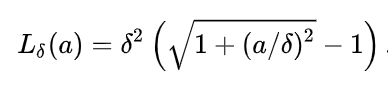
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [11]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    return np.sum(np.power(delta,2)*(np.sqrt(1+np.power((h(theta0, theta1, x)-y)/delta, 2)) - 1))/len(x)

## END ANSWER

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))
print(huberror(x[1], y, 0.29,0.52,0.1))

0.005791489779469562
0.006458677517895609


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [12]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [13]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [14]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.3
theta1 = 0.4
error = 0.016682
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.3
theta1 = 0.4
error = 0.1033

# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.3
theta1 = 0.4
error = 0.0009

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [15]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta_0 = 0
    theta_1 = 0
    old_error = sqerror(obsX, obsY, theta_0, theta_1)
    temp = theta_0
    theta_0 = theta_0 - alpha*np.sum((theta_1*obsX+temp-obsY)/len(obsX))
    theta_1 = theta_1 - alpha*np.sum((theta_1*obsX+temp-obsY)*obsX/len(obsX))
    new_error = sqerror(obsX, obsY, theta_0, theta_1)
    iterations = 1
    print('theta_0 = '+str(theta_0)+' '+'theta_1 = '+str(theta_1)+'error = '+str(new_error))
    while np.absolute(old_error-new_error) >= threshold:
        old_error = new_error
        temp = theta_0
        theta_1
        theta_0 = theta_0 - alpha*np.sum((theta_1*obsX+temp-obsY)/len(obsX))
        theta_1 = theta_1 - alpha*np.sum((theta_1*obsX+temp-obsY)*obsX/len(obsX))
        new_error = sqerror(obsX, obsY, theta_0, theta_1)
        iterations += 1
        print('theta_0 = '+str(theta_0)+' theta_1 = '+str(theta_1)+' error = '+str(new_error))
    return [theta_0,theta_1,new_error,iterations]
    
# END ANSWER

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.01,0.0001)
print("Results")
print(iterations, newError)

theta_0 = 0.004959119373723786 theta_1 = 0.0025013010404161297error = 0.2607337704370098
theta_0 = 0.009856509125999335 theta_1 = 0.004972126799942467 error = 0.2547531824310392
theta_0 = 0.01469293444487345 theta_1 = 0.007412854934057798 error = 0.2489199241748822
theta_0 = 0.019469151033808745 theta_1 = 0.009823858417180992 error = 0.24323036597595735
theta_0 = 0.02418590522924594 theta_1 = 0.012205505600693167 error = 0.2376809675647754
theta_0 = 0.02884393411670898 theta_1 = 0.014558160270240669 error = 0.23226827589186277
theta_0 = 0.033443965645471 theta_1 = 0.01688218170232778 error = 0.22698892297896148
theta_0 = 0.037986718741799014 theta_1 = 0.01917792472020794 error = 0.22183962382316819
theta_0 = 0.04247290342079489 theta_1 = 0.02144573974908222 error = 0.21681717435270792
theta_0 = 0.046903220896850104 theta_1 = 0.023685972870613574 error = 0.21191844943307048
theta_0 = 0.05127836369273134 theta_1 = 0.02589896587676539 error = 0.20714040092226876
theta_0 = 0.05559901574731

In [16]:
# observe theta0 and theta1
theta0, theta1

(0.34824282013970514, 0.18072708486410383)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [17]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta_0 = 0
    theta_1 = 0
    old_error = huberror(obsX, obsY, theta_0, theta_1, delta)
    a = (theta_0+theta_1*obsX-obsY)/np.sqrt((1+((theta_0+theta_1*obsX-obsY)/delta)**2))
    theta_0 = theta_0 - alpha*np.sum(a)/len(obsX)
    theta_1 = theta_1 - alpha*np.sum(a*obsX)/len(obsX)
    new_error = huberror(obsX, obsY, theta_0, theta_1, delta)
    iterations = 1
    # print('theta_0 = '+str(theta_0)+' '+'theta_1 = '+str(theta_1)+' error = '+str(new_error))
    while np.absolute(old_error-new_error) >= threshold:
        old_error = new_error
        a = (theta_0+theta_1*obsX-obsY)/np.sqrt((1+((theta_0+theta_1*obsX-obsY)/delta)**2))
        theta_0 = theta_0 - alpha*np.sum(a)/len(obsX)
        theta_1 = theta_1 - alpha*np.sum(a*obsX)/len(obsX)
        new_error = huberror(obsX, obsY, theta_0, theta_1, delta)
        iterations += 1
        # print('theta_0 = '+str(theta_0)+' theta_1 = '+str(theta_1)+' error = '+str(new_error))
    return [theta_0,theta_1,new_error,iterations]
## END ANSWER

# testing    
[theta0,theta1,error,iterations] = gdh(x[0], y, 0.01, 0.000001, 0.01)
print(iterations, error)

2246 0.0022133888687107433


### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
1.
theta0 = 0.21900868793517833
theta1 = 0.10696486575778374
alpha = 0.01
error = 0.0022133888687107433

2. The widget shows similar thing as the prior part
##### END ANSWER

In [18]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x[0],y)
print(result.intercept_)
print(result.coef_)

[0.27432228]
[[0.45661798]]


In [20]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[0],y,theta0,theta1)

0.016611812091141386

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_1^j
$$
$$
\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_2^j
$$

## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [21]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.
# BEGIN ANSWER
def sqerror2(x, y, theta0, theta1, theta2):
    return np.sum(np.power((theta0+theta1*x[0]+theta2*x[1]-y), 2))/len(x[0])
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    old_error = sqerror2(obsX, obsY, theta_0, theta_1, theta_2)
    a = theta_0+theta_1*obsX[0]+theta_2*obsX[1]-obsY
    theta_0 = theta_0 - alpha*np.sum(a)/len(obsX[0])
    theta_1 = theta_1 - alpha*np.sum(a*obsX[0])/len(obsX[0])
    theta_2 = theta_2 - alpha*np.sum(a*obsX[1])/len(obsX[0])
    new_error = sqerror2(obsX, obsY, theta_0, theta_1, theta_2)
    iterations = 1
    print('theta_0 = '+str(theta_0)+' theta_1 = '+str(theta_1)+' theta_2 '+str(theta_2)+' error = '+str(new_error))
    while np.absolute(old_error-new_error) >= threshold:
        old_error = new_error
        a = theta_0+theta_1*obsX[0]+theta_2*obsX[1]-obsY
        theta_0 = theta_0 - alpha*np.sum(a)/len(obsX[0])
        theta_1 = theta_1 - alpha*np.sum(a*obsX[0])/len(obsX[0])
        theta_2 = theta_2 - alpha*np.sum(a*obsX[1])/len(obsX[0])
        new_error = sqerror2(obsX, obsY, theta_0, theta_1, theta_2)
        iterations += 1
        print('theta_0 = '+str(theta_0)+' theta_1 = '+str(theta_1)+' theta_2 '+str(theta_2)+' error = '+str(new_error))
    return [theta_0,theta_1,theta_2,new_error,iterations]
    
    
# END ANSWER
[theta0,theta1,theta2, newError,iterations] = gd22(x,y,0.01,0.0001)
print(iterations, newError)

theta_0 = 0.004959119373723787 theta_1 = 0.0025013010404161297 theta_2 0.002539051820932272 error = 0.2594617686038213
theta_0 = 0.00984384401000739 theta_1 = 0.004965981423473754 theta_2 0.005040542097256905 error = 0.25227718633717944
theta_0 = 0.014655282932420532 theta_1 = 0.007394586925502351 theta_2 0.007505030718281583 error = 0.24530518067694573
theta_0 = 0.01939452863292934 theta_1 = 0.00978765518726655 theta_2 0.00993306922735595 error = 0.2385394613422675
theta_0 = 0.02406265731832373 theta_1 = 0.012145715835238446 theta_2 0.012325200946280144 error = 0.2319739241859856
theta_0 = 0.028660729152971444 theta_1 = 0.014469290601062182 theta_2 0.014681961097858852 error = 0.22560264568681157
theta_0 = 0.03318978849795347 theta_1 = 0.016758893439237737 theta_2 0.017003876926628504 error = 0.21941987760448542
theta_0 = 0.03765086414663482 theta_1 = 0.019015030643050466 theta_2 0.019291467817784874 error = 0.21342004179309002
theta_0 = 0.04204496955672378 theta_1 = 0.021238200958772

Write the values of thetas obtained from function above.
$$\theta_0 = 0.29230200595994776$$
$$\theta_1 = 0.1525684921962167$$
$$\theta_2 = 0.1526720847641292$$
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_1^j
$$
$$
\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_2^j
$$
$$
y = 0.1526720847641292*x_2 + 0.1525684921962167*x_1 + 0.29230200595994776
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [22]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
Y = y
X = np.stack(x)
X = X.reshape(2, -1).T
Y = Y.reshape(-1)

model = LinearRegression().fit(X, Y)

print(model.coef_)
print(model.intercept_)

[0.45718158 0.36702939]
0.09096981082366068


What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer
I got [0.45718158 0.36702939] for the coefficients. They are not really close to what I receive from my gradient descent implementation. The error is bigger than I got.

##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [39]:
## Begin ANSWER
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_testing)
X_scaled_values = temp[:,[[0],[1]]]
Y_scaled_values = temp[:,[2]]
x = X_scaled_values
y = Y_scaled_values
new_x = [x[:,0], x[:,1]]
x = new_x
Y = y
X = np.stack(x)
X = X.reshape(2, -1).T
Y = Y.reshape(-1)
predicted = []
for row in X:
     predicted.append(theta0+theta1*row[0]+theta2*row[1])
error_gs = np.sum(np.absolute(predicted-Y))/len(Y)
## End ANSWER
error_gd = print(np.absolute(error_gs))

0.1430866776467745


## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [41]:
## Begin ANSWER
predicted = model.predict(X)
error_lib = np.sum(np.absolute(predicted-Y))/len(Y)

## End ANSWER
error_lib = print(abs(error_lib))

0.12166769680633199


## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

### begin answer

The performance of Livrary Estimator is slightly better than gradient descent. I think both models are reasonable model for predicting home prices however, I still think that in industries, the model with libraries like sklearn are better than hard-coded gradient descent in terms of productivity.

### end answer

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) : 7
* how can we improve his lab? : The maths are a bit hard. Some of the questions might need more clear explanations.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab5.jpynb<br>
<b> Submit To: </b> codebench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 